sieci GAN (czyli sieci współzawodniczące)

wygląda trochę odwrotnie do autoencoderów - schemat (taki obalony trapez przyległy dłuższym bokiem do obalonego trójkąta/trapezu)

ten pierwszy to generator, a drugi to dyskryminator\
i chodzi tu o to, że generator generuje treści, a dyskryminator ma za zadanie rozróżnić treści podane przez generator (dane fałszywe) z innymi danymi wejściowymi (dane pobrane ze zbioru)\
i generator potem dostaje informacje zwrotną, w jaki sposób poprawić się tak, żeby móc oszukać dyskryminator\
uwaga! info zwrotne to nie accuracy\
i chcemy doprowadzć do idealnej sytuacji, kiedy dyskryminator nie będzie w stanie rozpoznać oszustwa generatora - czyli wszystko będzie klasyfikować jako rysunki stworzone przez człowieka (nie ma różnicy między zbiorami)

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()
EPOCHS = 10000


In [5]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Flatten,Reshape

generator = Sequential()
generator.add(Dense(28*28 // 2, input_shape = (20,), activation='relu'))
generator.add(Dense(28*28, activation='sigmoid'))
generator.add(Reshape((28,28)))

discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28, 28)))
discriminator.add(Dense(28*28 // 2, activation='relu'))
discriminator.add(Dense(1))

In [7]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)

2024-01-22 11:53:03.512865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28]
	 [[{{node Placeholder/_0}}]]
2024-01-22 11:53:03.513123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28]
	 [[{{node Placeholder/_0}}]]


epoch: 1; G_loss: 0.600758; D_loss: 1.503190


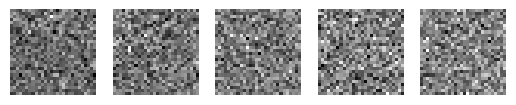

epoch: 101; G_loss: 4.422464; D_loss: 0.048469


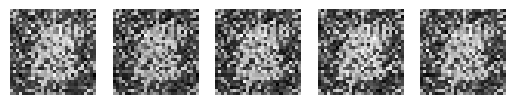

epoch: 201; G_loss: 5.236553; D_loss: 0.033735


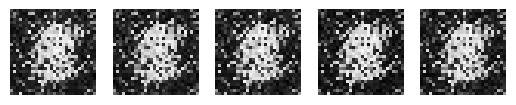

epoch: 301; G_loss: 5.284119; D_loss: 0.065776


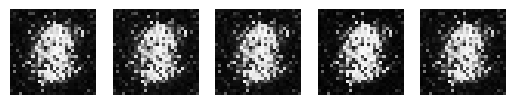

epoch: 401; G_loss: 3.462753; D_loss: 0.186143


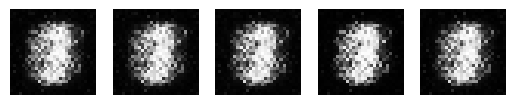

epoch: 501; G_loss: 2.752560; D_loss: 0.299080


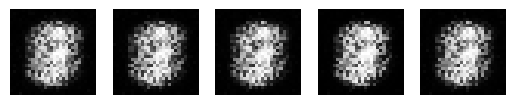

epoch: 601; G_loss: 2.933691; D_loss: 0.226375


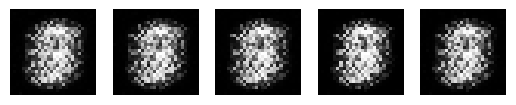

epoch: 701; G_loss: 2.894821; D_loss: 0.157601


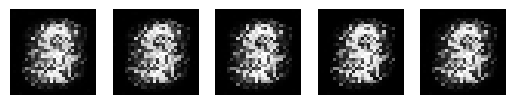

epoch: 801; G_loss: 3.179122; D_loss: 0.112783


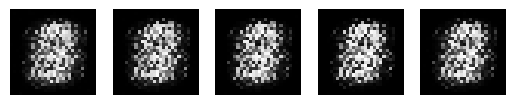

epoch: 901; G_loss: 3.336767; D_loss: 0.073364


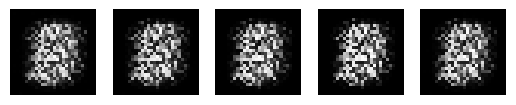

epoch: 1001; G_loss: 3.194471; D_loss: 0.074976


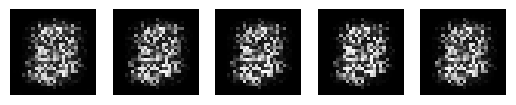

epoch: 1101; G_loss: 3.278265; D_loss: 0.099789


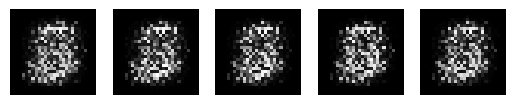

epoch: 1201; G_loss: 2.731381; D_loss: 0.103129


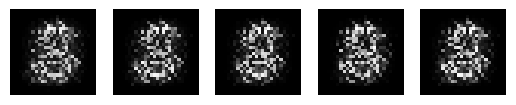

epoch: 1301; G_loss: 2.698871; D_loss: 0.183643


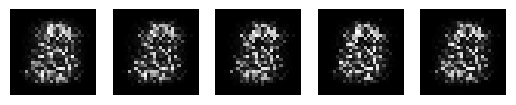

epoch: 1401; G_loss: 2.523375; D_loss: 0.166883


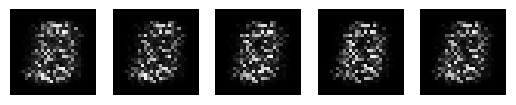

epoch: 1501; G_loss: 2.563036; D_loss: 0.166670


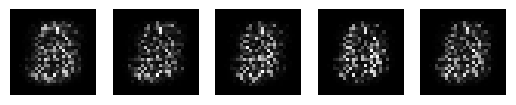

epoch: 1601; G_loss: 2.018249; D_loss: 0.258663


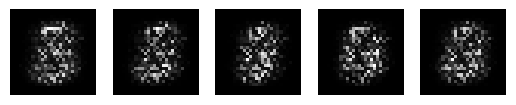

epoch: 1701; G_loss: 2.161714; D_loss: 0.262474


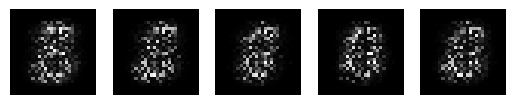

epoch: 1801; G_loss: 2.079443; D_loss: 0.258224


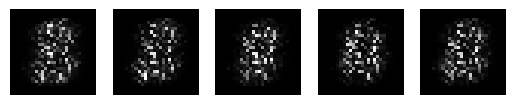

epoch: 1901; G_loss: 2.161760; D_loss: 0.166161


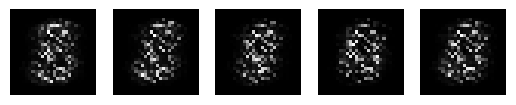

epoch: 2001; G_loss: 2.488375; D_loss: 0.166925


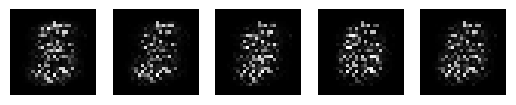

epoch: 2101; G_loss: 2.398224; D_loss: 0.154557


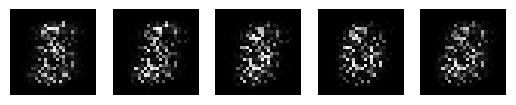

epoch: 2201; G_loss: 2.335503; D_loss: 0.240948


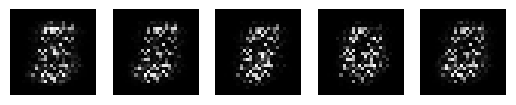

epoch: 2301; G_loss: 2.738931; D_loss: 0.147834


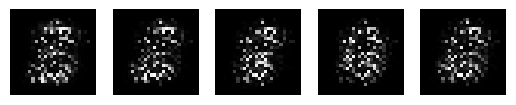

epoch: 2401; G_loss: 2.770376; D_loss: 0.134712


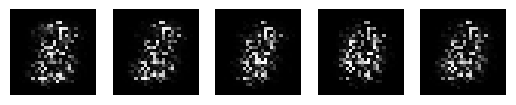

epoch: 2501; G_loss: 3.040781; D_loss: 0.118477


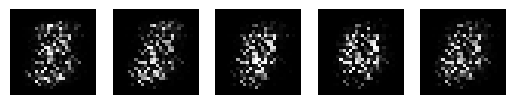

epoch: 2601; G_loss: 3.176224; D_loss: 0.107648


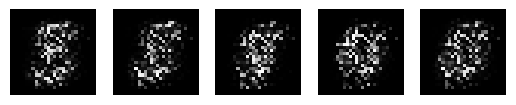

epoch: 2701; G_loss: 3.164994; D_loss: 0.116912


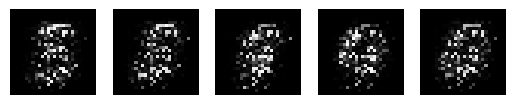

epoch: 2801; G_loss: 3.134944; D_loss: 0.087826


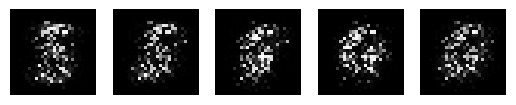

epoch: 2901; G_loss: 3.396021; D_loss: 0.088228


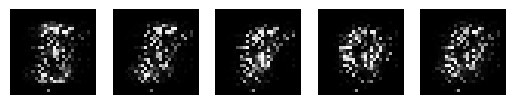

epoch: 3001; G_loss: 3.860926; D_loss: 0.091410


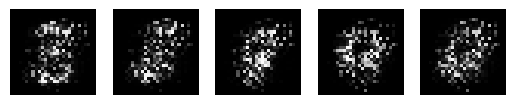

epoch: 3101; G_loss: 3.519991; D_loss: 0.096752


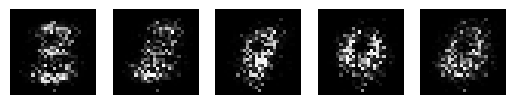

epoch: 3201; G_loss: 3.470885; D_loss: 0.116771


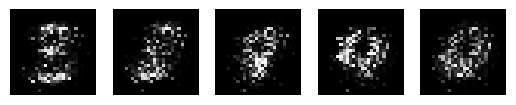

epoch: 3301; G_loss: 3.084085; D_loss: 0.161522


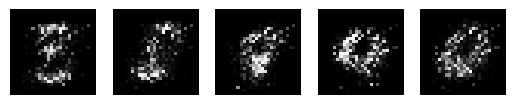

epoch: 3401; G_loss: 3.099078; D_loss: 0.119859


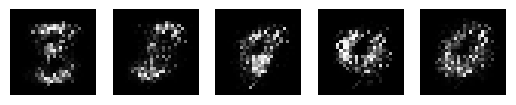

epoch: 3501; G_loss: 2.370405; D_loss: 0.318870


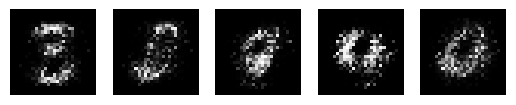

epoch: 3601; G_loss: 2.773846; D_loss: 0.333180


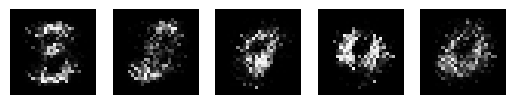

epoch: 3701; G_loss: 2.593431; D_loss: 0.284637


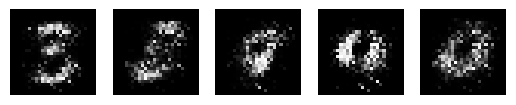

epoch: 3801; G_loss: 2.404167; D_loss: 0.337023


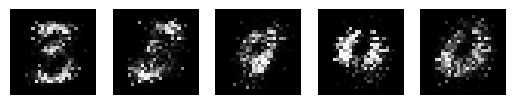

epoch: 3901; G_loss: 2.498297; D_loss: 0.272171


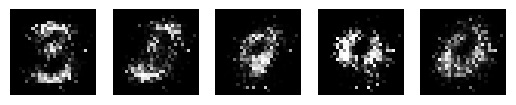

epoch: 4001; G_loss: 2.829306; D_loss: 0.221190


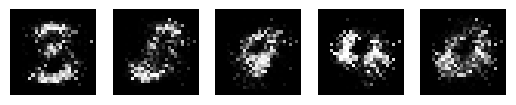

epoch: 4101; G_loss: 3.143891; D_loss: 0.211833


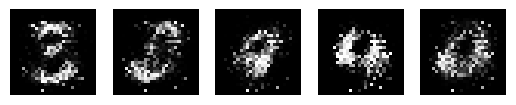

epoch: 4201; G_loss: 3.300940; D_loss: 0.236234


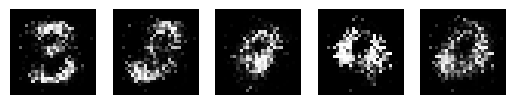

epoch: 4301; G_loss: 3.807544; D_loss: 0.118708


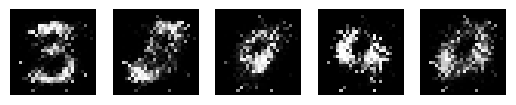

epoch: 4401; G_loss: 2.952775; D_loss: 0.192860


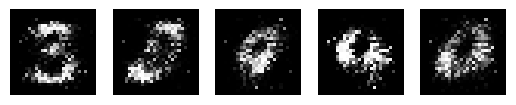

epoch: 4501; G_loss: 3.027652; D_loss: 0.191006


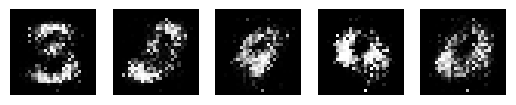

epoch: 4601; G_loss: 3.180038; D_loss: 0.155243


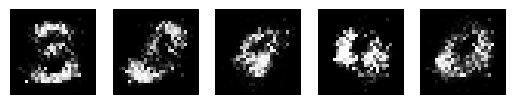

epoch: 4701; G_loss: 3.131748; D_loss: 0.175692


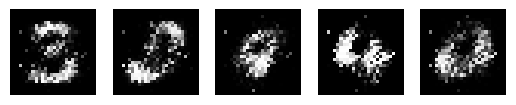

epoch: 4801; G_loss: 3.368321; D_loss: 0.124732


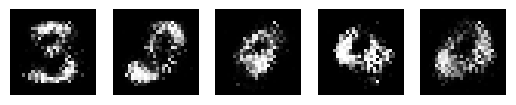

epoch: 4901; G_loss: 3.101873; D_loss: 0.164913


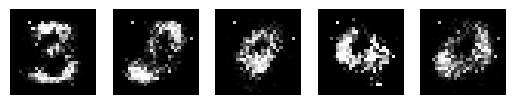

epoch: 5001; G_loss: 2.778059; D_loss: 0.207581


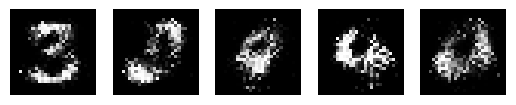

epoch: 5101; G_loss: 3.184781; D_loss: 0.196517


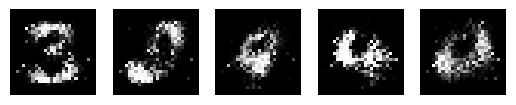

epoch: 5201; G_loss: 2.660955; D_loss: 0.264634


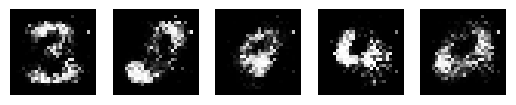

epoch: 5301; G_loss: 3.078791; D_loss: 0.156243


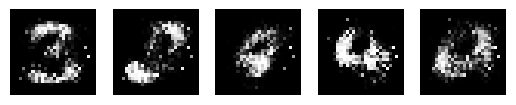

epoch: 5401; G_loss: 3.002494; D_loss: 0.150813


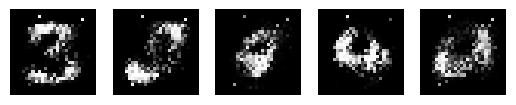

epoch: 5501; G_loss: 2.824625; D_loss: 0.247865


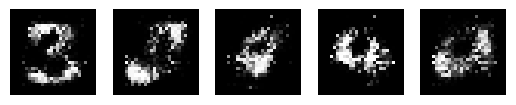

epoch: 5601; G_loss: 2.695213; D_loss: 0.217731


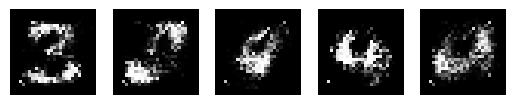

epoch: 5701; G_loss: 3.188523; D_loss: 0.147072


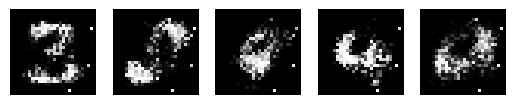

epoch: 5801; G_loss: 3.000068; D_loss: 0.156777


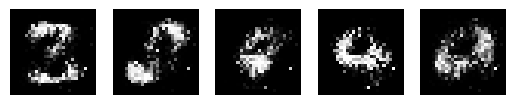

epoch: 5901; G_loss: 3.241213; D_loss: 0.139322


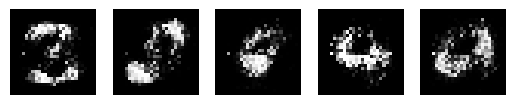

epoch: 6001; G_loss: 3.114873; D_loss: 0.158441


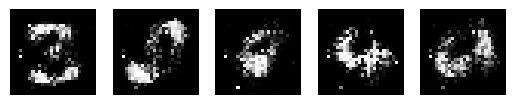

epoch: 6101; G_loss: 3.049038; D_loss: 0.174478


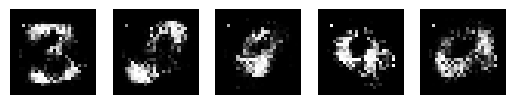

epoch: 6201; G_loss: 2.880698; D_loss: 0.161255


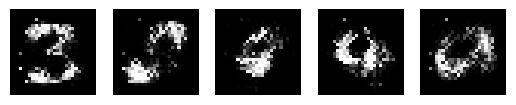

epoch: 6301; G_loss: 3.189441; D_loss: 0.115214


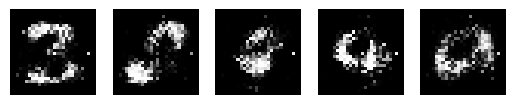

epoch: 6401; G_loss: 3.024459; D_loss: 0.165493


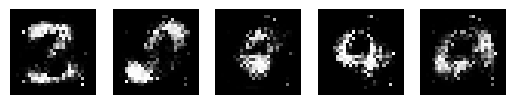

epoch: 6501; G_loss: 3.289127; D_loss: 0.166484


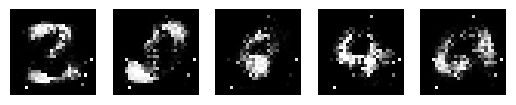

epoch: 6601; G_loss: 3.060509; D_loss: 0.147542


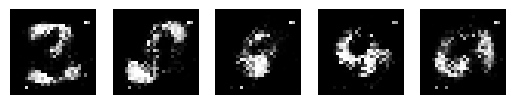

epoch: 6701; G_loss: 3.339310; D_loss: 0.183948


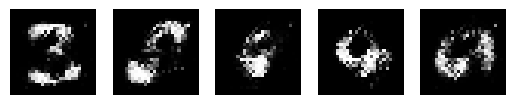

epoch: 6801; G_loss: 2.839145; D_loss: 0.177768


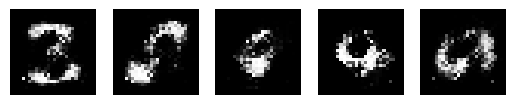

epoch: 6901; G_loss: 2.907713; D_loss: 0.258377


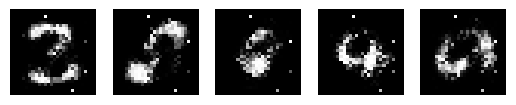

epoch: 7001; G_loss: 2.958463; D_loss: 0.217075


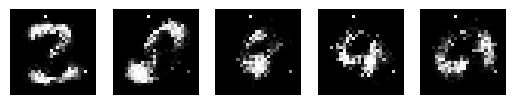

epoch: 7101; G_loss: 3.109467; D_loss: 0.175562


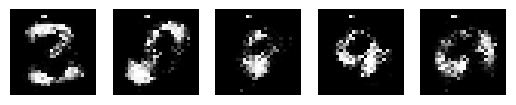

epoch: 7201; G_loss: 3.488682; D_loss: 0.131038


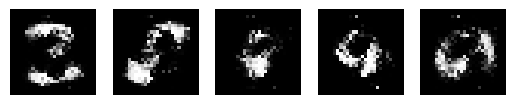

epoch: 7301; G_loss: 3.238913; D_loss: 0.164909


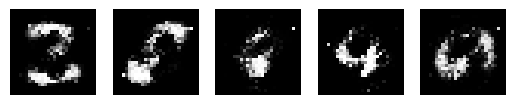

epoch: 7401; G_loss: 3.253132; D_loss: 0.169876


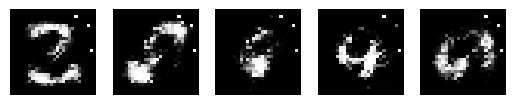

epoch: 7501; G_loss: 3.089691; D_loss: 0.244658


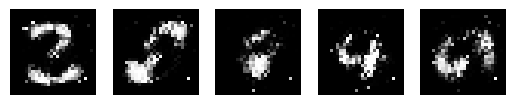

epoch: 7601; G_loss: 3.112698; D_loss: 0.200149


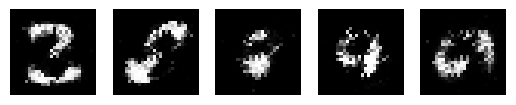

epoch: 7701; G_loss: 3.309830; D_loss: 0.223950


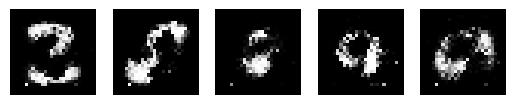

epoch: 7801; G_loss: 3.413503; D_loss: 0.211537


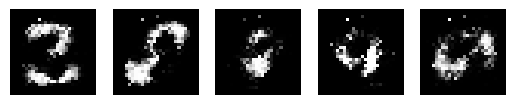

epoch: 7901; G_loss: 3.392701; D_loss: 0.204487


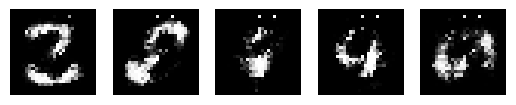

epoch: 8001; G_loss: 2.924440; D_loss: 0.248634


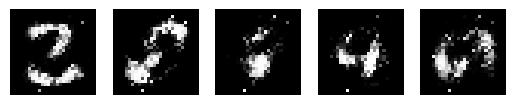

epoch: 8101; G_loss: 3.048077; D_loss: 0.237757


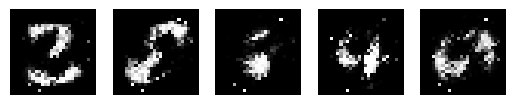

epoch: 8201; G_loss: 3.136585; D_loss: 0.141834


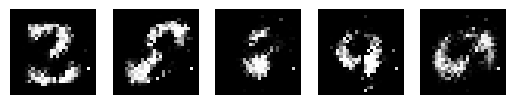

epoch: 8301; G_loss: 3.366304; D_loss: 0.137205


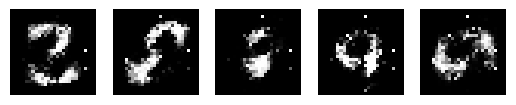

epoch: 8401; G_loss: 3.133384; D_loss: 0.253095


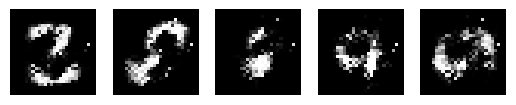

epoch: 8501; G_loss: 3.570700; D_loss: 0.187198


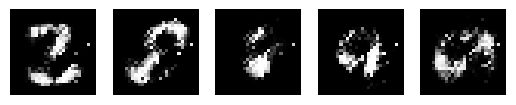

epoch: 8601; G_loss: 3.126143; D_loss: 0.219727


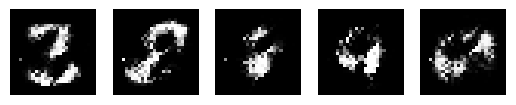

In [ ]:
batch_size = 100
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())
z_vis = tf.random.normal([10, 20])

for epoch in range(EPOCHS):
    z_mb = tf.random.normal([batch_size, 20])
    x_real = next(x_iter)
    # Record operations
    with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:  
        x_fake = generator(z_mb)
        G_loss_curr = G_loss(discriminator, x_fake)
        D_loss_curr = D_loss(discriminator, x_real, x_fake)
    # Gradients
    G_grad = G_tape.gradient(G_loss_curr, generator.trainable_variables)
    D_grad = D_tape.gradient(D_loss_curr, discriminator.trainable_variables)
    # Apply gradients
    G_opt.apply_gradients(zip(G_grad, generator.trainable_variables))
    D_opt.apply_gradients(zip(D_grad, discriminator.trainable_variables))
    
    if epoch % 100 == 0:
        # Print results
        print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
        # Plot generated images
        for i in range(5):
            plt.subplot(1, 5, i+1)
            plt.imshow(generator(z_vis)[i,:,:]*255.0, cmap="gray")
            plt.axis('off')
        plt.show()

zbliżenie się wykresów loss dla generatora i dyskryminatora - moment, w którym generator zaczyna robić coraz lepsze obrazki i dyskryminator chwilowo nie ogarnia i się nabiera
potem on też się uczy rozpoznawać i jego loss maleje 
no a potm finalnie znowu wzrasta, jak generator zaczyna być mega zajebisty